# Final Exam Review - Part 2 - Solutions

The **final exam will be cumulative**, however the purpose of *this document* is to help review the material that was not covered in any of the lab assignments that is more applied.

To review for this *cumulative exam*, I would suggest reviewing:
* these practice problems (*I would strongly suggest working through these practice problems yourself before looking at the solutions*)
* the lab assignments
* the lecture notes
* previous exams

<hr>

## <u>Case Study</u>: Wheat Seeds

In this set of practice problems, we will explore a dataset comprised of seven physical attributes of three different types of wheat seeds: Kama, Canadian, and Rosa. There are 70 seeds of each type in the dataset.

These physical seed attributes are:
* the area of the seed
* the perimeter of the seed
* the compactness of the seed
* the kernel length of the seed
* the width of the seed
* the asymmetry coefficient of the seed
* the kernel groove length of the seed.

With this dataset, we have the following three research goals.

### 1. Learning About/Describing the Dataset
We would like to learn and describe as much as we can about the 7-dimensional dataset of physical seed attributes. We will begin by using basic descriptive analytics techniques such as creating visualizations and summary statistics. 


### 2. Predicting the Area of *Kama Seeds*
We will use the following linear regression techniques to help us predict the area of *just Kama seeds*, given the six remaining physical attributes of the seed.
1. linear regression (regularized and non-regularized)

<hr>



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import t, norm, f

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import cross_val_score


## 1. Data Processing and Cleaning

### 1.1. Loading Data

Read the seeds.csv file into a dataframe and display the shape of the dataframe.

In [2]:
df=pd.read_csv('seeds.csv')
df.head()

,area,perimeter,compactness,kernel_length,width,asymmetry_coefficient,kernel_groove_length,seed_class
0,15.26,14.84,0.8710,5.762,2.212,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,2.222,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,2.227,2.699,4.825,kama
3,12.84,12.94,0.8955,5.224,2.279,2.259,4.805,kama
4,16.14,14.99,0.9024,5.658,2.562,1.255,5.175,kama


In [3]:
df.shape

(210, 8)

## 2. Basic Descriptive Analytics for the Full Dataset



### 2.1. Pairwise Attribute Relationships for Each Seed - Visualization

First, let's examine the relationship between each pair of physical attributes for each of the three different types of seeds. Plot this visualization below.

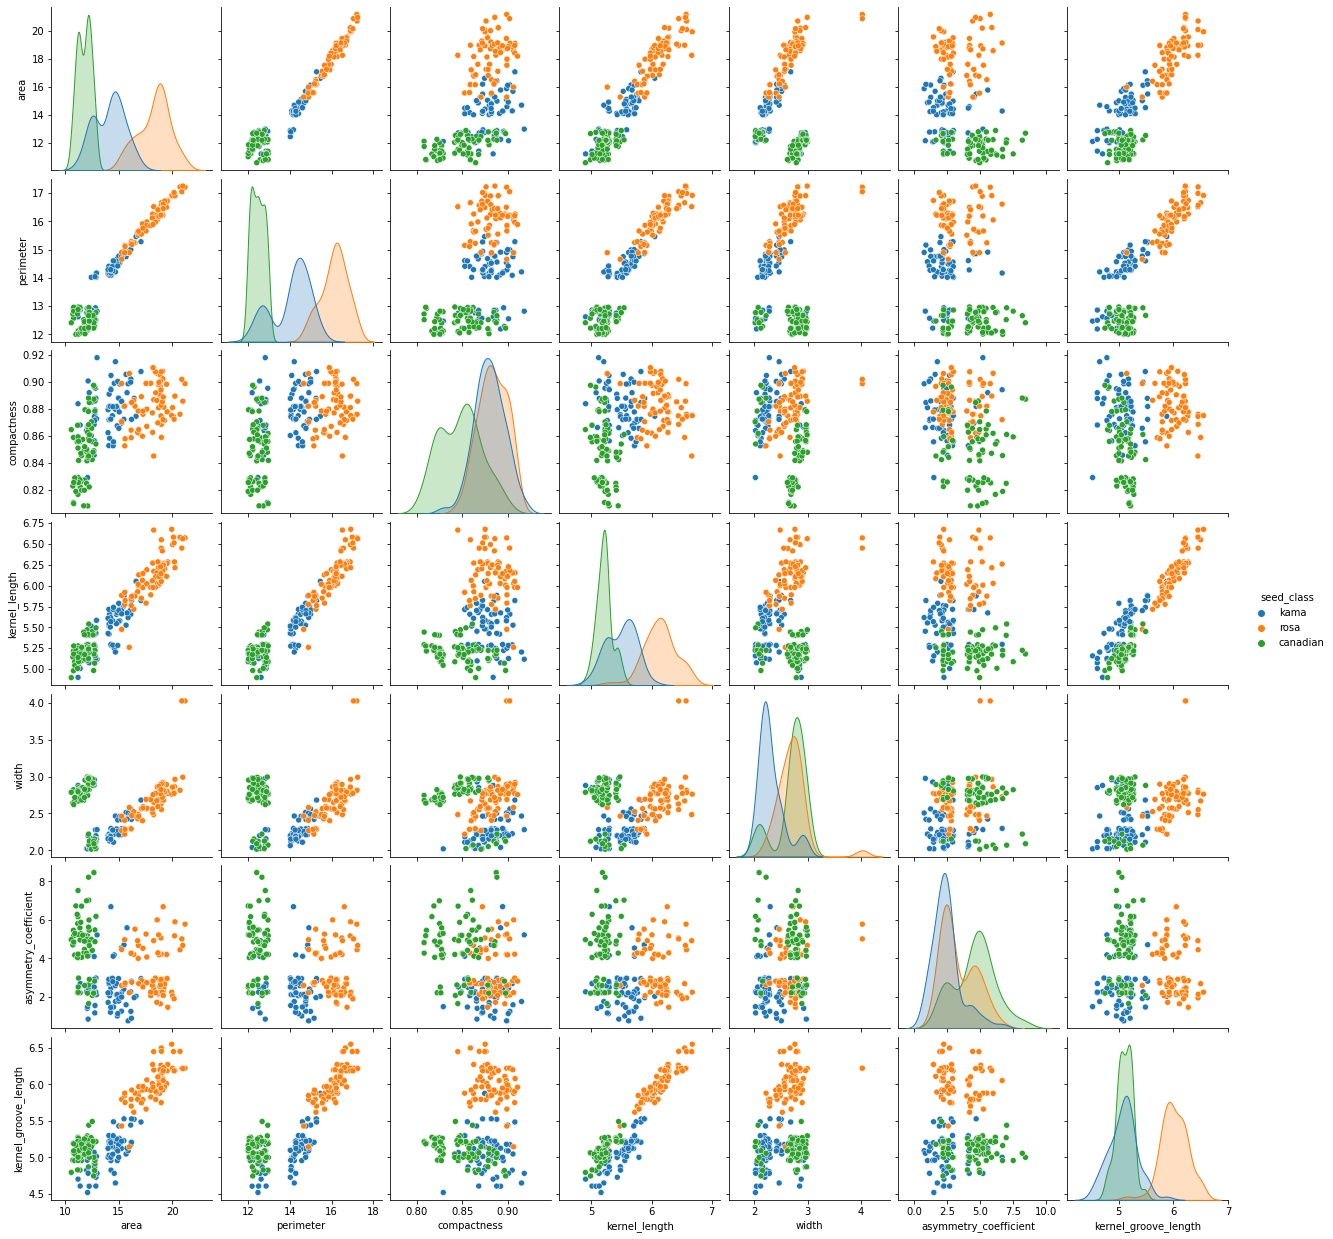

In [4]:
sns.pairplot(df, hue='seed_class')
plt.show()

### 2.2. Pairwise Attribute Relationships for Each Seed - Summary Statistics

#### 2.2.1 Correlations
Next, let's calculate the correlation between each pair of physical attributes for each of the three different types of seeds. Calculate this using one line of code below.

In [5]:
total_corr = df.groupby(['seed_class']).corr()
total_corr

area  perimeter  compactness  \
seed_class                                                           
canadian   area                   1.000000  -0.025381     0.547752   
           perimeter             -0.025381   1.000000     0.024650   
           compactness            0.547752   0.024650     1.000000   
           kernel_length          0.456859   0.131657    -0.298293   
           width                 -0.275328  -0.171454    -0.311186   
           asymmetry_coefficient -0.094557   0.132593    -0.030997   
           kernel_groove_length   0.160410   0.038643    -0.473474   
kama       area                   1.000000   0.908840     0.314517   
           perimeter              0.908840   1.000000     0.180114   
           compactness            0.314517   0.180114     1.000000   
           kernel_length          0.801517   0.855510    -0.144279   
           width                  0.072962  -0.038399     0.109805   
           asymmetry_coefficient -0.019076  -0.021112     0.115857   
           kernel_groove_length   0.704126   0.706403    -0.098148   
rosa       area                   1.000000   0.974524     0.272363   
           perimeter              0.974524   1.000000     0.057952   
           compactness            0.272363   0.057952     1.000000   
           kernel_length          0.808205   0.888591    -0.215854   
           width                  0.762164   0.662913     0.533617   
           asymmetry_coefficient -0.019078  -0.020720    -0.043672   
           kernel_groove_length   0.713440   0.802163    -0.261308   

                                  kernel_length     width  \
seed_class                                                  
canadian   area                        0.456859 -0.275328   
           perimeter                   0.131657 -0.171454   
           compactness                -0.298293 -0.311186   
           kernel_length               1.000000 -0.077403   
           width                      -0.077403  1.000000   
           asymmetry_coefficient       0.128401 -0.316461   
           kernel_groove_length        0.771908  0.100206   
kama       area                        0.801517  0.072962   
           perimeter                   0.855510 -0.038399   
           compactness                -0.144279  0.109805   
           kernel_length               1.000000 -0.042632   
           width                      -0.042632  1.000000   
           asymmetry_coefficient      -0.075574 -0.137796   
           kernel_groove_length        0.842001  0.070187   
rosa       area                        0.808205  0.762164   
           perimeter                   0.888591  0.662913   
           compactness                -0.215854  0.533617   
           kernel_length               1.000000  0.465466   
           width                       0.465466  1.000000   
           asymmetry_coefficient      -0.038404  0.166059   
           kernel_groove_length        0.928998  0.338211   

                                  asymmetry_coefficient  kernel_groove_length  
seed_class                                                                     
canadian   area                               -0.094557              0.160410  
           perimeter                           0.132593              0.038643  
           compactness                        -0.030997             -0.473474  
           kernel_length                       0.128401              0.771908  
           width                              -0.316461              0.100206  
           asymmetry_coefficient               1.000000              0.102785  
           kernel_groove_length                0.102785              1.000000  
kama       area                               -0.019076              0.704126  
           perimeter                          -0.021112              0.706403  
           compactness                         0.115857             -0.098148  
           kernel_length                      -0.075574        

#### 2.2.2. Visualizating the Correlations

For each of the three seed classes, visualize these correlations using a heat map. (You can use more than one line of code here).

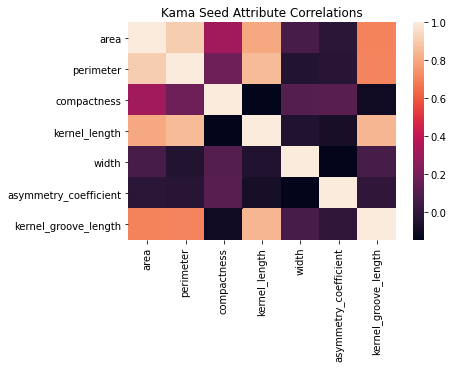

In [6]:
sns.heatmap(df[df['seed_class']=='kama'].corr())
plt.title('Kama Seed Attribute Correlations')
plt.show()

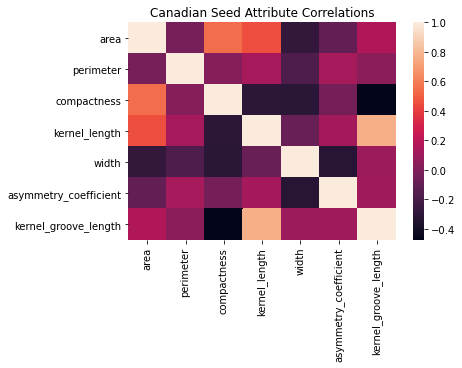

In [7]:
sns.heatmap(df[df['seed_class']=='canadian'].corr())
plt.title('Canadian Seed Attribute Correlations')
plt.show()

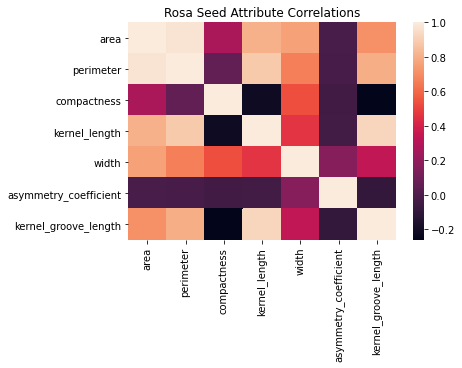

In [8]:
sns.heatmap(df[df['seed_class']=='rosa'].corr())
plt.title('Rosa Seed Attribute Correlations')
plt.show()

## 3. Predicting the Area of Kama Seeds with Six Attributes

Now, suppose that we would like to predict the area of *just Kama seeds*. We will use the 6 remaining seed attributes to help us predict the seed area. Ideally, we would like for our linear regression model to achieve accurate predictions for *new dataset*. Thus, we would like to build a model an accurate model that does not overfit to the training dataset. Let's try to determine the optimal combination of the 6 available explanatory variables that will yield this parsimonious model.

### 3.1. Preprocessing
First, create a dataframe that is comprised of just the Kama seeds.


In [9]:
df_kama = df[df['seed_class']=='kama']
df_kama

,area,perimeter,compactness,kernel_length,width,asymmetry_coefficient,kernel_groove_length,seed_class
0,15.26,14.84,0.8710,5.762,2.212,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,2.222,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,2.227,2.699,4.825,kama
3,12.84,12.94,0.8955,5.224,2.279,2.259,4.805,kama
4,16.14,14.99,0.9024,5.658,2.562,1.255,5.175,kama
...,...,...,...,...,...,...,...,...
65,12.88,12.50,0.8879,5.129,2.119,2.252,4.607,kama
66,14.24,14.27,0.8726,5.620,2.190,1.212,5.150,kama
67,14.01,14.29,0.8625,5.609,2.158,2.217,5.122,kama
68,14.27,14.29,0.8726,5.569,2.152,1.464,5.200,kama


### 3.2. Backwards Elimination Algorithm

First, we will use a backwards elimination algorithm with the *full kama seeds dataset*, using the adjusted $R^2$ in attempt to find a parsimonious linear regression model that predicts kama seed area.

Perform this backwards elimination algorithm below. Display the summary output table of your final model.

**Hint:** Once you have instantiated a fitted **smf.ols()** class, you can quickly extract the adjusted $R^2$ of the linear regression model by using the **.rsquared_adj** attribute for this class.

#### <u>ITERATION 1</u>

#### 1.1. Current Model = Full Model =  Predicts Area using all  6 Available Explanatory Variables

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
current_mod = smf.ols('area~perimeter+compactness+kernel_length+width+asymmetry_coefficient+kernel_groove_length', data=df_kama).fit()
current_mod.rsquared_adj

0.8749967159980494

#### 1.2. Trying out Test Models

Try out 6 test models, where each test model has had one of the explanatory variables removed from the current model.

In [12]:
#Perimeter has been removed
test_mod = smf.ols('area~compactness+kernel_length+width+asymmetry_coefficient+kernel_groove_length', data=df_kama).fit()
test_mod.rsquared_adj

0.8229786826605335

In [13]:
#compactness has been removed
current_mod = smf.ols('area~perimeter+kernel_length+width+asymmetry_coefficient+kernel_groove_length', data=df_kama).fit()
current_mod.rsquared_adj

0.8309650243622617

In [14]:
#kernel_length has been removed
current_mod = smf.ols('area~perimeter+compactness+width+asymmetry_coefficient+kernel_groove_length', data=df_kama).fit()
current_mod.rsquared_adj

0.8652664963172043

In [15]:
#width has been removed
current_mod = smf.ols('area~perimeter+compactness+kernel_length+asymmetry_coefficient+kernel_groove_length', data=df_kama).fit()
current_mod.rsquared_adj

0.8718454633537757

In [16]:
#asymmetry_coefficient has been removed
current_mod = smf.ols('area~perimeter+compactness+kernel_length+width+kernel_groove_length', data=df_kama).fit()
current_mod.rsquared_adj

0.8769280602700078

In [17]:
#kernel_groove_length has been removed
current_mod = smf.ols('area~perimeter+compactness+kernel_length+width+asymmetry_coefficient', data=df_kama).fit()
current_mod.rsquared_adj

0.8750721843581379

#### 1.3. Permanently Removing Asymmetry Coefficient

The test model with the highest adjusted $R^2$ removed asymmetry coefficient. Furthermore, this adjusted $R^2$ (0.8769) was higher than the current model adjusted $R^2$ (0.8749967). Thus, we will permanently remove asymmetry coefficient from the current model and move on to the next iteration of the algorithm.

#### <u>ITERATION 2</u>

#### 2.1. Current Model = Asymmetry Coefficient Permanently Removed

In [18]:
current_mod = smf.ols('area~perimeter+compactness+kernel_length+width+kernel_groove_length', data=df_kama).fit()
current_mod.rsquared_adj

0.8769280602700078

#### 2.2. Trying out Test Models

Try out 5 test models, where each test model has had one of the explanatory variables removed from the current model.

In [19]:
#Perimeter has been removed
test_mod = smf.ols('area~compactness+kernel_length+width+kernel_groove_length', data=df_kama).fit()
test_mod.rsquared_adj

0.8256998824778163

In [20]:
#compactness has been removed
current_mod = smf.ols('area~perimeter+kernel_length+width+kernel_groove_length', data=df_kama).fit()
current_mod.rsquared_adj

0.8334029439398388

In [21]:
#kernel_length has been removed
current_mod = smf.ols('area~perimeter+compactness+width+kernel_groove_length', data=df_kama).fit()
current_mod.rsquared_adj

0.8670139517926979

In [22]:
#width has been removed
current_mod = smf.ols('area~perimeter+compactness+kernel_length+kernel_groove_length', data=df_kama).fit()
current_mod.rsquared_adj

0.8735056689443057

In [23]:
#kernel_groove_length has been removed
current_mod = smf.ols('area~perimeter+compactness+kernel_length+width', data=df_kama).fit()
current_mod.rsquared_adj

0.8769904812344924

#### 2.3. Permanently Removing Kernel Groove Length Coefficient

The test model with the highest adjusted $R^2$ removed kernel groove length. Furthermore, this adjusted $R^2$ (0.87699) was higher than the current model adjusted $R^2$ (0.876928). Thus, we will permanently remove kernel groove length from the current model and move on to the next iteration of the algorithm.

#### <u>ITERATION 3</u>

#### 3.1. Current Model = Asymmetry Coefficient and Kernel Groove Length Permanently Removed

In [24]:
current_mod = smf.ols('area~perimeter+compactness+kernel_length+width', data=df_kama).fit()
current_mod.rsquared_adj

0.8769904812344924

#### 3.2. Trying out Test Models

Try out 4 test models, where each test model has had one of the explanatory variables removed from the current model.

In [25]:
#Perimeter has been removed
test_mod = smf.ols('area~compactness+kernel_length+width', data=df_kama).fit()
test_mod.rsquared_adj

0.8277535214707233

In [26]:
#compactness has been removed
current_mod = smf.ols('area~perimeter+kernel_length+width', data=df_kama).fit()
current_mod.rsquared_adj

0.8327103032760247

In [27]:
#kernel_length has been removed
current_mod = smf.ols('area~perimeter+compactness+width', data=df_kama).fit()
current_mod.rsquared_adj

0.851198372139337

In [28]:
#width has been removed
current_mod = smf.ols('area~perimeter+compactness+kernel_length', data=df_kama).fit()
current_mod.rsquared_adj

0.8721711399766445

#### 3.3. Stopping the Algorithm

The test model with the highest adjusted $R^2$ removed width. Furthermore, this adjusted $R^2$ (0.872) was not higher than the current model adjusted $R^2$ (0.87699). Thus we will stop the algorithm and stick with our current model that just has asymmetry coefficient and kernel groove length removed.

#### <u>Final Model</u>


In [29]:
final_mod = smf.ols('area~perimeter+compactness+kernel_length+width', data=df_kama).fit()
final_mod.rsquared_adj

0.8769904812344924

### 3.3. Cross Validation with Non-Regularized Final Model from 3.2

Using k=5 fold cross-validation and the remaining explanatory variables from your final model from 3.2, find the average and standard deviation mean squared error (MSE) of the 5 test folds produced by the non-regularized linear regression model.

In [30]:
X=df_kama[['perimeter','compactness','kernel_length','width']]
X

,perimeter,compactness,kernel_length,width
0,14.84,0.8710,5.762,2.212
1,14.57,0.8811,5.554,2.222
2,14.09,0.9050,5.291,2.227
3,12.94,0.8955,5.224,2.279
4,14.99,0.9024,5.658,2.562
...,...,...,...,...
65,12.50,0.8879,5.129,2.119
66,14.27,0.8726,5.620,2.190
67,14.29,0.8625,5.609,2.158
68,14.29,0.8726,5.569,2.152


In [31]:
y=df_kama['area']
y

0     15.26
1     14.88
2     14.29
3     12.84
4     16.14
      ...  
65    12.88
66    14.24
67    14.01
68    14.27
69    12.72
Name: area, Length: 70, dtype: float64

In [32]:
from sklearn.linear_model import Lasso, LinearRegression
finalmod = LinearRegression()
scores0 = cross_val_score(finalmod, X, y, cv=5, scoring="neg_mean_squared_error")
print("CV MSE scores:", -scores0)
print("Average MSE:", round(-scores0.mean(), 2))
print("Std. error:", round(scores0.std()/np.sqrt(len(scores0)), 2))

CV MSE scores: [0.23581829 0.2416456  0.37985186 0.07025258 0.64527792]
Average MSE: 0.31
Std. error: 0.09


### 3.4. Cross Validation with Non-Regularized Linear Regression and All 6 Available Explanatory Variables

Using k=5 fold cross-validation and all six available explanatory variables, find the average and standard deviation mean squared error (MSE) of the 5 test folds produced by the non-regularized linear regression model.

In [33]:
X=df_kama[['perimeter','compactness','kernel_length','width', 'asymmetry_coefficient', 'kernel_groove_length']]
X

,perimeter,compactness,kernel_length,width,asymmetry_coefficient,kernel_groove_length
0,14.84,0.8710,5.762,2.212,2.221,5.220
1,14.57,0.8811,5.554,2.222,1.018,4.956
2,14.09,0.9050,5.291,2.227,2.699,4.825
3,12.94,0.8955,5.224,2.279,2.259,4.805
4,14.99,0.9024,5.658,2.562,1.255,5.175
...,...,...,...,...,...,...
65,12.50,0.8879,5.129,2.119,2.252,4.607
66,14.27,0.8726,5.620,2.190,1.212,5.150
67,14.29,0.8625,5.609,2.158,2.217,5.122
68,14.29,0.8726,5.569,2.152,1.464,5.200


In [34]:
y=df_kama['area']
y

0     15.26
1     14.88
2     14.29
3     12.84
4     16.14
      ...  
65    12.88
66    14.24
67    14.01
68    14.27
69    12.72
Name: area, Length: 70, dtype: float64

In [35]:
from sklearn.linear_model import Lasso, LinearRegression
fullmod = LinearRegression()
scores1 = cross_val_score(fullmod, X, y, cv=5, scoring="neg_mean_squared_error")
print("CV MSE scores:", -scores1)
print("Average MSE:", round(-scores1.mean(), 2))
print("Std. error:", round(scores1.std()/np.sqrt(len(scores1)), 2))

CV MSE scores: [0.2397414  0.23776862 0.40087027 0.10084457 0.85494639]
Average MSE: 0.37
Std. error: 0.12


### 3.5. Cross Validation with LASSO Linear Regression and All 6 Available Explanatory Variables

Next, we would like to use a LASSO linear regression model and all 6 available explanatory variables to help select the ideal explanatory variables to use in our linear regression model. In addition, we would also like to try out the following regularization parameter values $\alpha \in [0.001, 0.10, 0.50, 1.00, 2.00, 5]$ in our LASSO model as well. 

#### 3.5.1 Best $\alpha$ Value and Average Test Fold MSE

Use k=5 fold cross-validation to determine which value of $\alpha$ will yield the lowest average MSE of of the 5 test folds. What is the average MSE of the LASSO model with the best value of $\alpha$.

In [36]:
from sklearn.linear_model import LassoCV
model = LassoCV(cv=5, alphas=[0.001,0.10, 0.50, 1.00, 2.00, 5]).fit(X, y)

model

LassoCV(alphas=[0.001, 0.1, 0.5, 1.0, 2.0, 5], cv=5)

In [37]:
model.alpha_

0.1

In [38]:
test_mse_df= pd.DataFrame(model.mse_path_, index=model.alphas_, columns=['test_fold_%s_avg_MSE'%(str(i)) for i in range(1,6)])
test_mse_df

,test_fold_1_avg_MSE,test_fold_2_avg_MSE,test_fold_3_avg_MSE,test_fold_4_avg_MSE,test_fold_5_avg_MSE
5.000,1.858713,1.929188,2.401587,1.212990,2.933373
2.000,1.858713,1.929188,2.401587,1.212990,2.933373
1.000,1.488753,1.647217,2.099507,0.858001,2.933373
0.500,0.709330,0.551637,1.038350,0.342306,0.863597
0.100,0.377590,0.339849,0.578368,0.187706,0.304720
0.001,0.239951,0.252141,0.408038,0.116254,0.889901


In [39]:
test_mse_df.iloc[4,:].mean()

0.357646503846439

When $\alpha=0.01$ in the LASSO model, the average test fold MSE is the lowest at 0.358.

#### 3.5.2. Coefficients of Best LASSO Model

What are the slopes of the LASSO model with the best value of $\alpha$? Which slopes is the LASSO model unequivocally suggesting should not be included in the model?

In [40]:
pd.DataFrame(model.coef_, columns=['Best_LASSO_Slopes'], index=X.columns)

,Best_LASSO_Slopes
perimeter,1.28635
compactness,0.00000
kernel_length,0.00000
width,0.00000
asymmetry_coefficient,-0.00000
kernel_groove_length,0.00000


The LASSO model with $\alpha=0.01$. is suggesting that only perimeter should be in the model as the rest of the slopes were set to be 0.

### 3.6. Best Explanatory Variables

Given our results from 3.3, 3.4, and 3.5, what is the best combination of explanatory variables to use in our model that produces the lowest average test fold MSE?

The final model that was found using the backwards elimination algorithm in 3.2 and then test in 3.3 had the lowest average test fold MSE of 0.31. This was the model that included the following explanatory variables:
* perimeter
* compactness
* kernel length
* width

### 3.7. Model Fit

How much kama seed area variability *in the full kama seeds dataset* does this best model from 3.6 explain?

In [41]:
current_mod = smf.ols('area~perimeter+compactness+kernel_length+width', data=df_kama).fit()
current_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     124.0
Date:                Sun, 01 May 2022   Prob (F-statistic):           1.13e-29
Time:                        20:59:38   Log-Likelihood:                -46.683
No. Observations:                  70   AIC:                             103.4
Df Residuals:                      65   BIC:                             114.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -30.4550      4.666     -6.527      0.000     -39.773     -21.137
perimeter         0.8264      0.158      5.236      0.000       0.511       1.142
compactness      22.3521      4.492      4.976      0.000      13.381      31.324
kernel_length     2.2177      0.576      3.852      0.000       1.068       3.367
width             0.4844      0.256      1.894      0.063      -0.026       0.995
==============================================================================
Omnibus:                       11.638   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.238
Skew:                          -0.773   Prob(JB):                      0.00133
Kurtosis:                       4.465   Cond. No.                     1.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model explains $R^2$=88.4% of kama seed area variability in the *full kama seeds dataset*.